In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd


with open('Timescale_results.json') as timescale_json, open ('Postgres_results.json') as postgres_json, open ('SQLDB_results.json') as sqldb_json, open ('Cosmos_results.json') as cosmos_json, open ('ADX_results.json') as adx_json:
    results_timescale = json.load(timescale_json)
    results_postgres = json.load(postgres_json)
    results_sqldb = json.load(sqldb_json)
    results_cosmos = json.load(cosmos_json)
    results_adx = json.load(adx_json)

In [2]:
# Create DataFrames
df_timescale = pd.DataFrame(results_timescale)
df_postgres = pd.DataFrame(results_postgres)
df_sqldb = pd.DataFrame(results_sqldb)
df_cosmos = pd.DataFrame(results_cosmos)
df_adx = pd.DataFrame(results_adx)

df_timescale['DatabaseName'] = 'Timescale'
df_postgres['DatabaseName'] = 'Postgres'
df_sqldb['DatabaseName'] = 'SQLDB'
df_cosmos['DatabaseName'] = 'Cosmos'
df_adx['DatabaseName'] = 'ADX'

df = pd.concat([df_timescale, df_postgres, df_sqldb, df_cosmos, df_adx])


In [3]:
df = df[df.NumberOfRowsReturned != 0]
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df.drop(columns=['QueryString', 'Maximum', 'Minimum', 'Mean', 'StandardDeviation', 'NumberOfRuns', 'NumberOfRowsReturned'])
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']
df

,QueryType,Median,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,DatabaseName
0,Point,19.0,GP_Gen5_2,100000000,128.79,Timescale
3,"Range, 10",25.5,GP_Gen5_2,100000000,128.79,Timescale
4,"Range, 10",25.0,GP_Gen5_2,100000000,128.79,Timescale
5,"Range, 10",24.0,GP_Gen5_2,100000000,128.79,Timescale
6,"Range, 20",31.0,GP_Gen5_2,100000000,128.79,Timescale
...,...,...,...,...,...,...
136,"Range, 50",134.0,Standard_D14_v2,100000000,2155.85,ADX
137,"Range, 50",132.0,Standard_D14_v2,100000000,2155.85,ADX
141,Aggregate,65.0,Standard_D14_v2,100000000,2155.85,ADX
142,Aggregate,65.0,Standard_D14_v2,100000000,2155.85,ADX


In [4]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['DatabaseName','QueryType','DatabaseSize', 'RowsInDataBase', 'EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
    }
)
df

,DatabaseName,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median
0,ADX,Aggregate,Dev(No SLA)_Standard_E2a_v4,1000000,100.63,13.000000
1,ADX,Aggregate,Dev(No SLA)_Standard_E2a_v4,10000000,100.63,22.333333
2,ADX,Aggregate,Dev(No SLA)_Standard_E2a_v4,100000000,100.63,116.666667
3,ADX,Aggregate,Standard_D13_v2,1000000,1077.93,25.000000
4,ADX,Aggregate,Standard_D13_v2,10000000,1077.93,32.000000
...,...,...,...,...,...,...
220,Timescale,"Range, 50",GP_Gen5_2,10000000,128.79,21.500000
221,Timescale,"Range, 50",GP_Gen5_2,100000000,128.79,45.500000
222,Timescale,"Range, 50",GP_Gen5_8,1000000,506.78,19.000000
223,Timescale,"Range, 50",GP_Gen5_8,10000000,506.78,21.666667


In [5]:
df = df.groupby(['DatabaseName','DatabaseSize', 'RowsInDataBase', 'EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
    }
)
df

,DatabaseName,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median
0,ADX,Dev(No SLA)_Standard_E2a_v4,1000000,100.63,11.800000
1,ADX,Dev(No SLA)_Standard_E2a_v4,10000000,100.63,17.400000
2,ADX,Dev(No SLA)_Standard_E2a_v4,100000000,100.63,89.866667
3,ADX,Standard_D13_v2,1000000,1077.93,29.466667
4,ADX,Standard_D13_v2,10000000,1077.93,26.666667
5,ADX,Standard_D13_v2,100000000,1077.93,66.400000
6,ADX,Standard_D14_v2,1000000,2155.85,12.600000
7,ADX,Standard_D14_v2,10000000,2155.85,26.466667
8,ADX,Standard_D14_v2,100000000,2155.85,72.200000
9,Cosmos,1200 RU/s,1000000,64.01,7.766667


In [6]:
a = df.EstimatedMonthlyCosts.unique()
a

array([ 100.63, 1077.93, 2155.85,   64.01,  256.05,  512.11, 1010.78,
        128.79,  506.78, 2687.98,  339.15, 1345.79])

In [7]:
df.set_index(["DatabaseName","EstimatedMonthlyCosts"], inplace=True)
df = df.loc[['Postgres', 'Timescale','SQLDB','Cosmos','ADX'], [64.01, 100, 100.63, 128.79, 256.05, 339.15, 506.78, 512.11, 1010.78, 1077.93, 1345.79, 2155.85, 2687.98,], :]
# df_1 = df.loc[[         
        #  ], :]
print(df.to_string())


                                                   DatabaseSize  RowsInDataBase        Median
DatabaseName EstimatedMonthlyCosts                                                           
Postgres     128.79                                   GP_Gen5_2         1000000    260.066667
             128.79                                   GP_Gen5_2        10000000   2696.933333
             128.79                                   GP_Gen5_2       100000000  54678.466667
             506.78                                   GP_Gen5_8         1000000    165.066667
             506.78                                   GP_Gen5_8        10000000    425.600000
             506.78                                   GP_Gen5_8       100000000  23121.366667
             1010.78                                 GP_Gen5_16         1000000    172.866667
             1010.78                                 GP_Gen5_16        10000000    428.666667
             1010.78                                 GP_Gen5

In [8]:
df_1Mil = df[df.RowsInDataBase == 1000000]
df_1Mil = df_1Mil.drop(columns=['DatabaseSize', 'RowsInDataBase'])
df_1Mil = df_1Mil.reset_index()
print(df_1Mil.to_string())

   DatabaseName  EstimatedMonthlyCosts       Median
0      Postgres                 128.79   260.066667
1      Postgres                 506.78   165.066667
2      Postgres                1010.78   172.866667
3     Timescale                 128.79    18.966667
4     Timescale                 506.78    19.000000
5     Timescale                1010.78    19.033333
6         SQLDB                 339.15  1376.600000
7         SQLDB                1345.79   412.000000
8         SQLDB                2687.98   411.800000
9        Cosmos                  64.01     7.766667
10       Cosmos                 256.05     6.766667
11       Cosmos                 512.11     7.200000
12          ADX                 100.63    11.800000
13          ADX                1077.93    29.466667
14          ADX                2155.85    12.600000


<AxesSubplot:title={'center':'1 Million Rows'}, xlabel='EstimatedMonthlyCosts', ylabel='Aggregate Median Duration'>

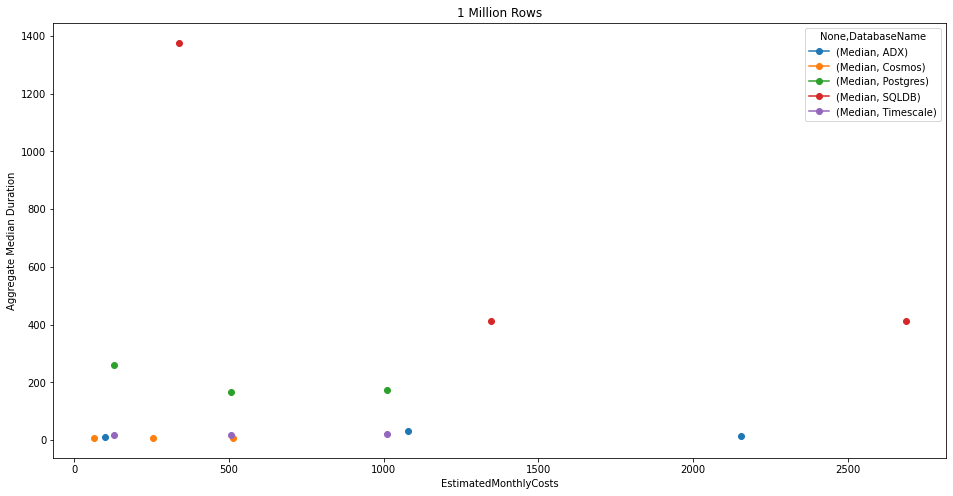

In [9]:
df_1Mil.groupby(['DatabaseName','EstimatedMonthlyCosts']).aggregate( {
         'Median': 'mean',
    }).unstack(['DatabaseName']).plot(marker = 'o', figsize=(16,8), title='1 Million Rows', ylabel='Aggregate Median Duration')

In [10]:
df_10Mil = df[df.RowsInDataBase == 10000000]
df_10Mil = df_10Mil.drop(columns=['DatabaseSize', 'RowsInDataBase'])
df_10Mil = df_10Mil.reset_index()
print(df_10Mil.to_string())

   DatabaseName  EstimatedMonthlyCosts        Median
0      Postgres                 128.79   2696.933333
1      Postgres                 506.78    425.600000
2      Postgres                1010.78    428.666667
3     Timescale                 128.79     20.600000
4     Timescale                 506.78     20.433333
5     Timescale                1010.78     20.366667
6         SQLDB                 339.15  13571.000000
7         SQLDB                1345.79   3419.733333
8         SQLDB                2687.98   3307.133333
9        Cosmos                  64.01     43.466667
10       Cosmos                 256.05     37.400000
11       Cosmos                 512.11     37.066667
12          ADX                 100.63     17.400000
13          ADX                1077.93     26.666667
14          ADX                2155.85     26.466667


<AxesSubplot:title={'center':'10 Million Rows'}, xlabel='EstimatedMonthlyCosts', ylabel='Aggregate Median Duration'>

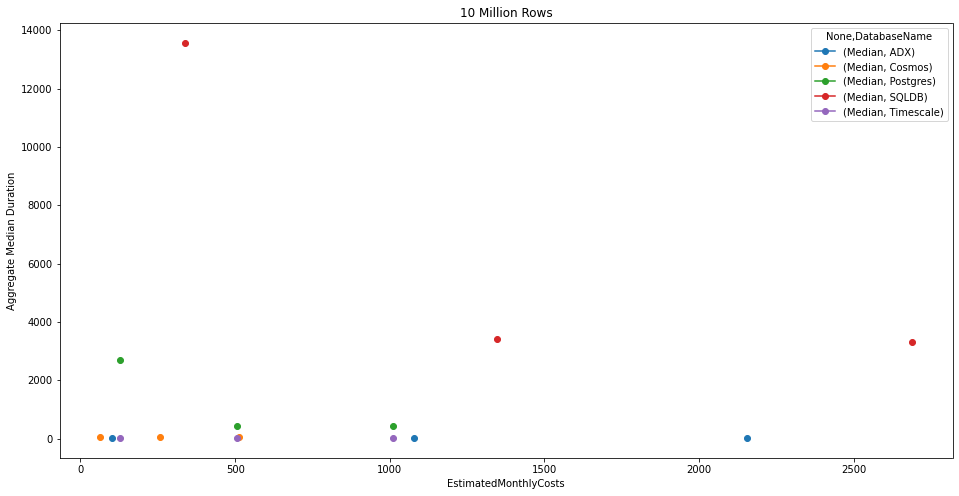

In [11]:
df_10Mil.groupby(['DatabaseName','EstimatedMonthlyCosts']).aggregate( {
         'Median': 'mean',
    }).unstack(['DatabaseName']).plot(marker = 'o', figsize=(16,8), title='10 Million Rows', ylabel='Aggregate Median Duration')

In [12]:
df_100Mil = df[df.RowsInDataBase == 100000000]
df_100Mil = df_100Mil.drop(columns=['DatabaseSize', 'RowsInDataBase'])
df_100Mil = df_100Mil.reset_index()
print(df_100Mil.to_string())

   DatabaseName  EstimatedMonthlyCosts        Median
0      Postgres                 128.79  54678.466667
1      Postgres                 506.78  23121.366667
2      Postgres                1010.78  18845.533333
3     Timescale                 128.79     32.933333
4     Timescale                 506.78     31.500000
5     Timescale                1010.78     31.900000
6         SQLDB                 339.15  92186.733333
7         SQLDB                1345.79  33758.733333
8         SQLDB                2687.98  29919.266667
9        Cosmos                  64.01  21303.200000
10       Cosmos                 256.05   6392.400000
11       Cosmos                 512.11   2882.826667
12          ADX                 100.63     89.866667
13          ADX                1077.93     66.400000
14          ADX                2155.85     72.200000


<AxesSubplot:title={'center':'100 Million Rows'}, xlabel='EstimatedMonthlyCosts', ylabel='Aggregate Median Duration'>

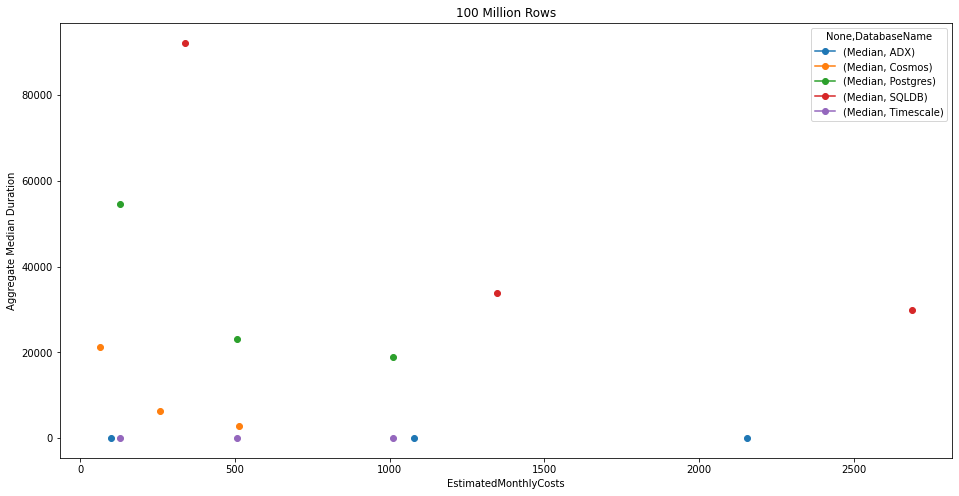

In [13]:
df_100Mil.groupby(['DatabaseName','EstimatedMonthlyCosts']).aggregate( {
         'Median': 'mean',
    }).unstack(['DatabaseName']).plot(marker = 'o', figsize=(16,8), title='100 Million Rows', ylabel='Aggregate Median Duration')